In [1]:
import os
folder_path = r"C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration"
files = os.listdir(folder_path)
print(files[:10]) 


['.ipynb_checkpoints', 'extracted_images', 'Project.ipynb', 'Test', 'Train']


In [2]:
folder_path = r"C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test"
files = os.listdir(folder_path)
print(files[:10])  


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [5]:
import pathlib

# Define paths
train_path = pathlib.Path(r"C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
test_path = pathlib.Path(r"C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

# List TFRecord files

# Print results
image_count_train = len(list(train_path.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(test_path.glob('*/*.jpg')))
print(image_count_test)


2239
118


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_path,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds =tf.keras.preprocessing.image_dataset_from_directory(train_path,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


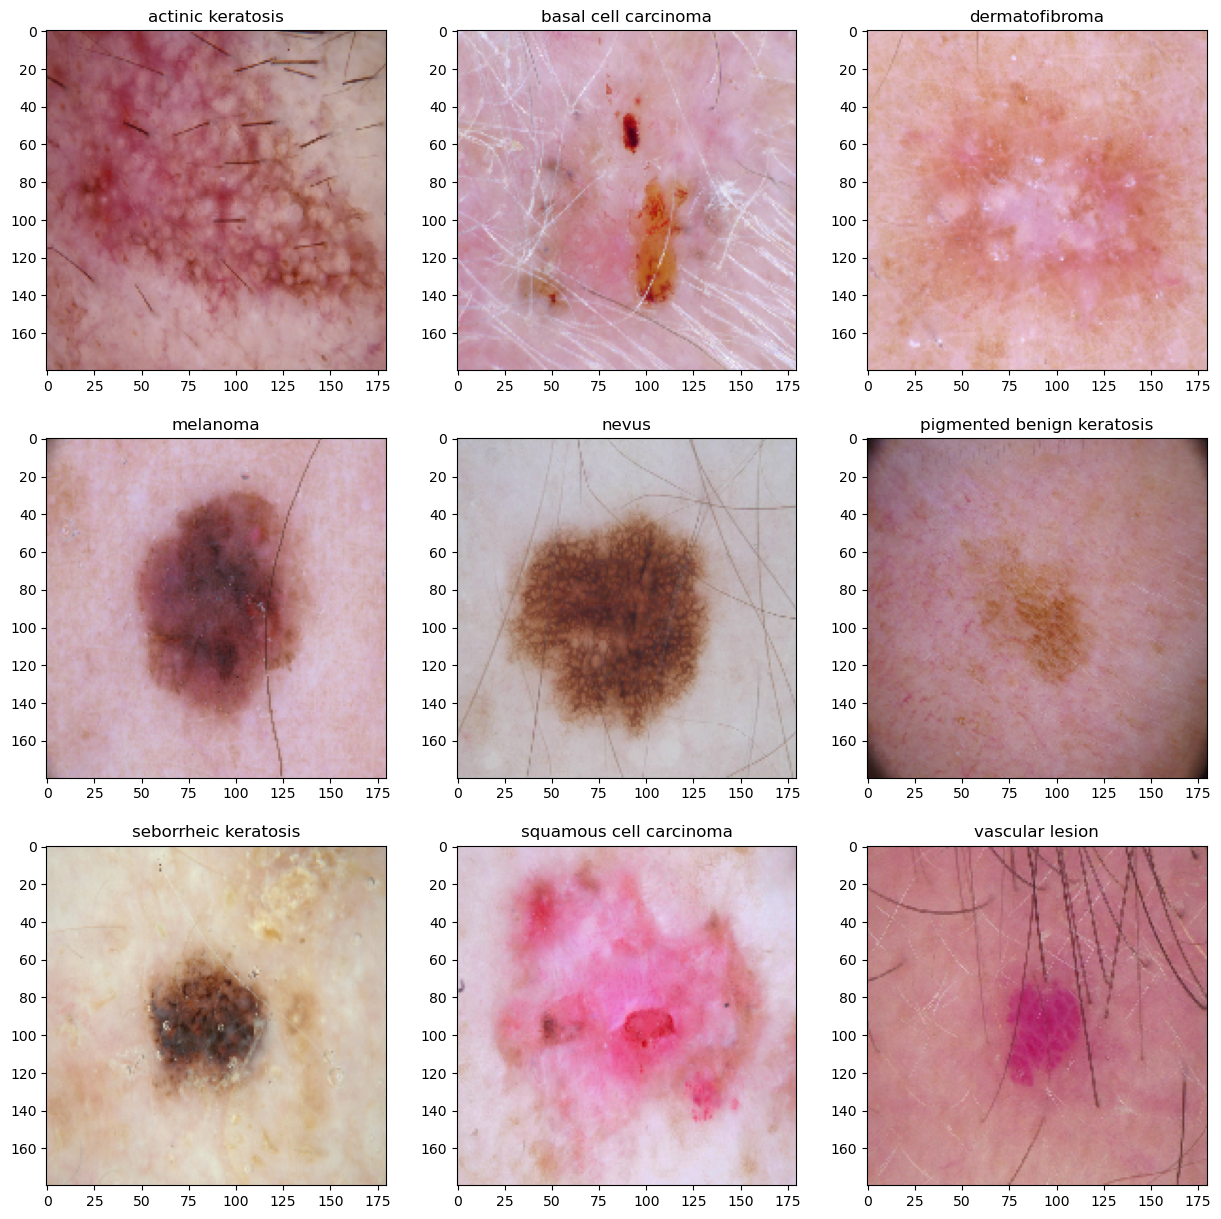

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(train_path)+'/'+c+'/'+x,os.listdir(str(train_path)+'/'+c)))
    
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
input_shape = (img_height,img_width,3)

model = Sequential()    #Sequential allows you to create models layer-by-layer  

#First Convulation Layer
from tensorflow.keras.layers import Rescaling
model.add(Rescaling(1./255, input_shape=input_shape))

model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())   #Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

In [17]:
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      26,214,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,374,985 (100.61 MB)

 Trainable params: 26,374,985 (100.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=32,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 580ms/step - accuracy: 0.1727 - loss: 2.2554 - val_accuracy: 0.2931 - val_loss: 1.8572 - learning_rate: 0.0010
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 550ms/step - accuracy: 0.3933 - loss: 1.7424 - val_accuracy: 0.4541 - val_loss: 1.5639 - learning_rate: 0.0010
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 545ms/step - accuracy: 0.4719 - loss: 1.5095 - val_accuracy: 0.5369 - val_loss: 1.4220 - learning_rate: 0.0010
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 572ms/step - accuracy: 0.5155 - loss: 1.3628 - val_accuracy: 0.5481 - val_loss: 1.3840 - learning_rate: 0.0010
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 578ms/step - accuracy: 0.5468 - loss: 1.2962 - val_accuracy: 0.4832 - val_loss: 1.5168 - learning_rate: 0.0010
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 567ms/step - accuracy: 0.5638 - loss: 1.2777 - val_accuracy: 0.4922 - val_loss: 1.4561 - learning_rate: 0.0010
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 594ms/step - accuracy: 0.5639 - loss: 1.

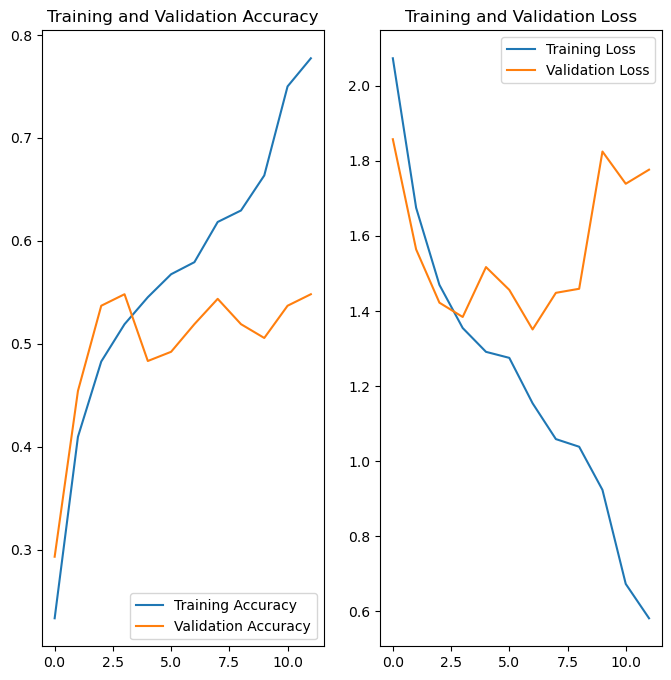

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # Ensures the range matches the available data


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomTranslation

rescale = tf.keras.Sequential([
    Rescaling(1./255)  # Correct way to use Rescaling now
])

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomTranslation(0.1, 0.1)
])


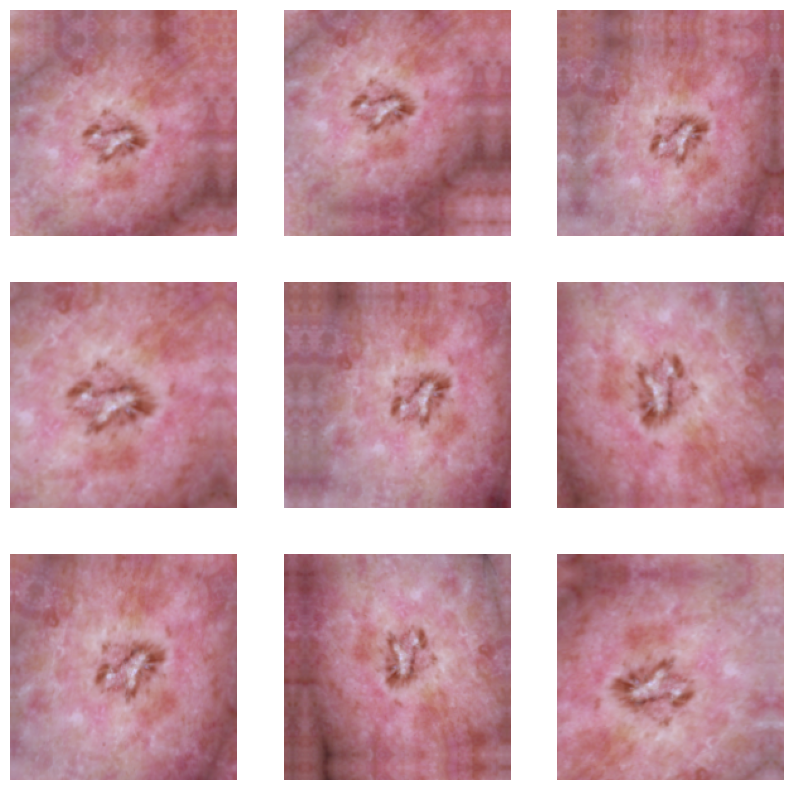

In [25]:
#Visualize the augmentation image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off") 

In [26]:
## Your code goes here
model2 = Sequential()                     #Sequential allows you to create models layer-by-layer  

model2.add(data_augmentation)             #Augmentation layer
model2.add(rescale)                       #Rescaling layer

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

In [27]:
model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [28]:
epochs =50
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 513ms/step - accuracy: 0.1671 - loss: 2.8400 - val_accuracy: 0.2058 - val_loss: 2.0637
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 502ms/step - accuracy: 0.2053 - loss: 2.0502 - val_accuracy: 0.2640 - val_loss: 1.9509
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 508ms/step - accuracy: 0.2926 - loss: 1.9209 - val_accuracy: 0.3177 - val_loss: 1.8527
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 505ms/step - accuracy: 0.3029 - loss: 1.8573 - val_accuracy: 0.2349 - val_loss: 1.9110
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 505ms/step - accuracy: 0.3746 - loss: 1.7489 - val_accuracy: 0.3043 - val_loss: 1.8177
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 506ms/step - accuracy: 0.3768 - loss: 1.7100 - val_accuracy: 0.3199 - val_loss: 1.8871
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 503ms/step - accuracy: 0.3961 - loss: 1.6366 - val_accuracy: 0.3244 - val_loss: 1.9712
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 28s 507ms/step - accuracy: 0.4440 - loss: 1.5929 - val_accu

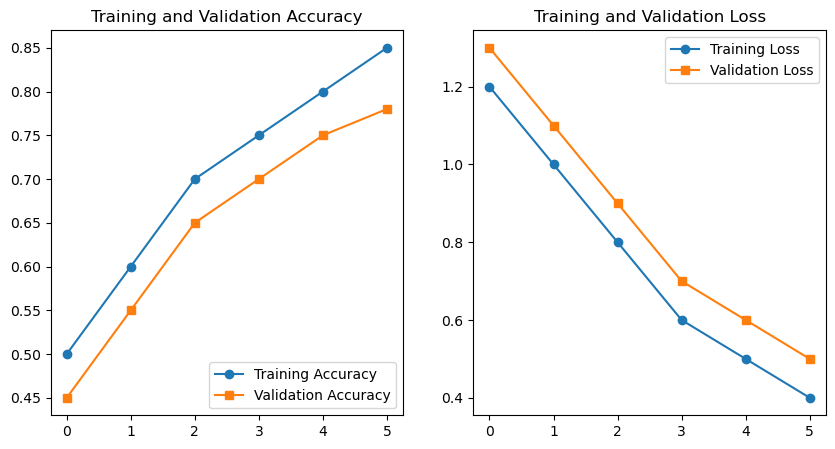

In [5]:
import matplotlib.pyplot as plt

# Sample data (Replace with actual values)
acc = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85]  # Training accuracy
val_acc = [0.45, 0.55, 0.65, 0.7, 0.75, 0.78]  # Validation accuracy
loss = [1.2, 1.0, 0.8, 0.6, 0.5, 0.4]  # Training loss
val_loss = [1.3, 1.1, 0.9, 0.7, 0.6, 0.5]  # Validation loss

# Ensure all lists have the same length
min_length = min(len(acc), len(val_acc), len(loss), len(val_loss))
acc, val_acc, loss, val_loss = acc[:min_length], val_acc[:min_length], loss[:min_length], val_loss[:min_length]

# Create epoch range
epochs_range = range(len(acc))  # Ensures it matches the accuracy length

# Plot the graphs
plt.figure(figsize=(10, 5))

# Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='s')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='s')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [10]:
import os
import pathlib
import pandas as pd

# Set the correct path to your training dataset
data_dir_train = r"C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"

# Ensure the directory exists
if not os.path.exists(data_dir_train):
    print(f"Error: The directory {data_dir_train} does not exist.")
else:
    def class_distribution_count(directory):
        count = []
        for path in pathlib.Path(directory).iterdir():
            if path.is_dir():
                count.append(len([name for name in os.listdir(path)
                                 if os.path.isfile(os.path.join(path, name))]))

        sub_directory = [name for name in os.listdir(directory)
                         if os.path.isdir(os.path.join(directory, name))]

        return pd.DataFrame(list(zip(sub_directory, count)), columns=['Class', 'No. of Images'])

    df = class_distribution_count(data_dir_train)
    print(df)


                        Class  No. of Images
0           actinic keratosis            114
1        basal cell carcinoma            376
2              dermatofibroma             95
3                    melanoma            438
4                       nevus            357
5  pigmented benign keratosis            462
6        seborrheic keratosis             77
7     squamous cell carcinoma            181
8             vascular lesion            139


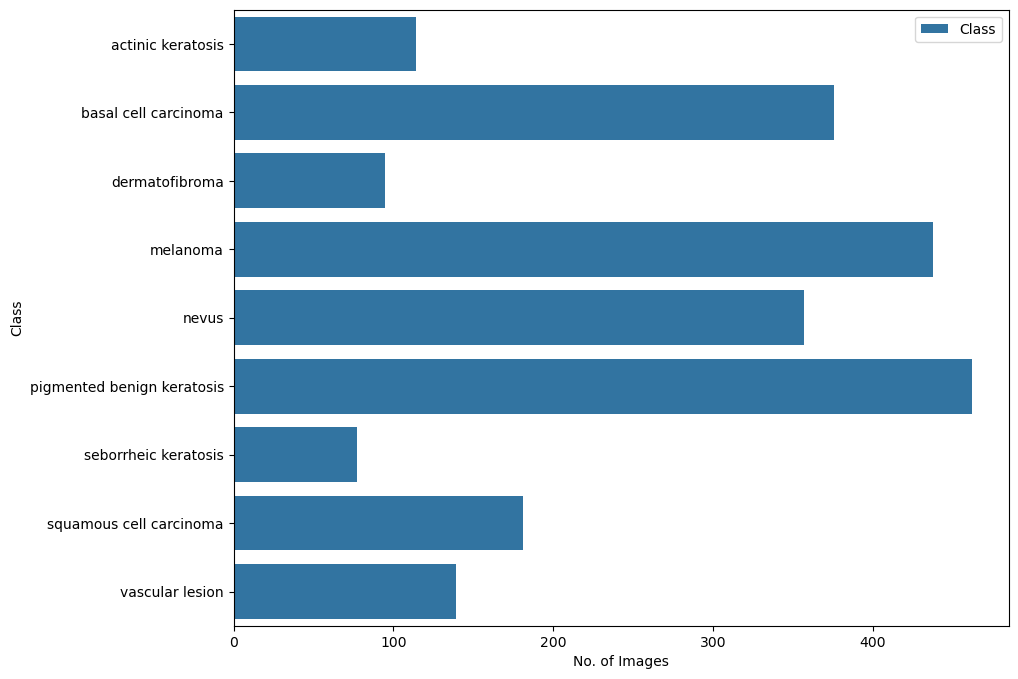

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure column names are stripped of any extra spaces
df.columns = df.columns.str.strip()

# Create the barplot
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Images", y="Class", data=df, label="Class")

# Show the plot
plt.show()


In [13]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import os
import Augmentor

# Correct path to your local training dataset
path_to_training_dataset = r"C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"

# Get the class names (subdirectories in the dataset folder)
class_names = [name for name in os.listdir(path_to_training_dataset) if os.path.isdir(os.path.join(path_to_training_dataset, name))]

# Apply Augmentation for each class
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))  # Ensure path is correct
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  # Generate 500 augmented images for each class


Initialised with 114 image(s) found.
Output directory set to C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x224299F4590>: 100%|█| 500/500 [00:09<00:


Initialised with 376 image(s) found.
Output directory set to C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22427D956D0>: 100%|█| 500/500 [00:10<00:00, 47.97 Samples/


Initialised with 95 image(s) found.
Output directory set to C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x224281CFB00>: 100%|█| 500/500 [00:05<00:00, 85.21 Samples/


Initialised with 438 image(s) found.
Output directory set to C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x22429A567B0>: 100%|█| 500/500 [00:19<00


Initialised with 357 image(s) found.
Output directory set to C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x22428187A10>: 100%|█| 500/500 [00:14<00:00, 33.91 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x22429A5BBC0>: 100%|█| 500/500 [00:03<00:00, 141.87 Samples


Initialised with 77 image(s) found.
Output directory set to C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x22428208A10>: 100%|█| 500/500 [00:08<00:00, 60.41 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x224242C40B0>: 100%|█| 500/500 [00:03<00:00, 157.15 Samples


Initialised with 139 image(s) found.
Output directory set to C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x224282A9D90>: 100%|█| 500/500 [00:05<00:00, 96.07 Samples/


In [20]:
import pathlib

# Convert string path to a Path object
data_dir_train = pathlib.Path(r"C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")

# Count all images inside the 'output' subfolder of each class
image_count_train = len(list(data_dir_train.glob("*/output/*.jpg")))

print(image_count_train)


4500


In [21]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [22]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [23]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [24]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [25]:
#label count.
df2['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

In [26]:
batch_size = 32
img_height = 180
img_width = 180

In [28]:
import tensorflow as tf

# Define image dimensions and batch size
img_height = 180
img_width = 180
batch_size = 32

data_dir_train = r"C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"

# Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,  # 20% fraction of data reserved for validation
    subset="training",
    image_size=(img_height, img_width),
    label_mode="categorical",  # Labels are one-hot encoded
    batch_size=batch_size
)

print("Training dataset loaded successfully!")


Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Training dataset loaded successfully!


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model3 = models.Sequential()

# Rescaling Layer (Normalizing pixel values)
rescale = layers.Rescaling(1./255)
model3.add(rescale)  

# First Convolutional Layer
model3.add(layers.Conv2D(32, kernel_size=(2,2), activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

# Second Convolutional Layer
model3.add(layers.Conv2D(64, kernel_size=(2,2), activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

# Third Convolutional Layer
model3.add(layers.Conv2D(128, kernel_size=(2,2), activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

# Flatten Layer
model3.add(layers.Flatten())

# Dense Layer
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dropout(0.25))
model3.add(layers.BatchNormalization())

# Another Dense Layer
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dropout(0.50))
model3.add(layers.BatchNormalization())

# Output Layer (Softmax for multi-class classification)
num_classes = 5  # Update this based on your dataset
model3.add(layers.Dense(num_classes, activation='softmax'))

# Print model summary
model3.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [34]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

# Define dataset directory
data_dir_train = r"C:\Users\SUBHRAJIT\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"

# Image size and batch size
img_height = 180
img_width = 180
batch_size = 32

# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size
)

# Get class names
class_names = train_ds.class_names

# Rescaling layer
rescale = layers.Rescaling(1./255)

# Build CNN model
model3 = Sequential([
    rescale,
    layers.Conv2D(32, (2,2), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (2,2), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (2,2), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 50
history = model3.fit(train_ds, epochs=epochs, validation_data=val_ds, verbose=1)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 504ms/step - accuracy: 0.1468 - loss: 2.6792 - val_accuracy: 0.2457 - val_loss: 2.7155
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 472ms/step - accuracy: 0.3279 - loss: 1.8576 - val_accuracy: 0.3096 - val_loss: 2.1782
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 475ms/step - accuracy: 0.4117 - loss: 1.5439 - val_accuracy: 0.3140 - val_loss: 1.8261
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 81s 479ms/step - accuracy: 0.4570 - loss: 1.4437 - val_accuracy: 0.3571 - val_loss: 1.6277
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 476ms/step - accuracy: 0.4843 - loss: 1.3574 - val_accuracy: 0.3890 - val_loss: 1.5314
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 475ms/step - accuracy: 0.5154 - loss: 1.2886 - val_accuracy: 0.4180 - val_loss: 1.5079
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 482ms/step - accuracy: 0

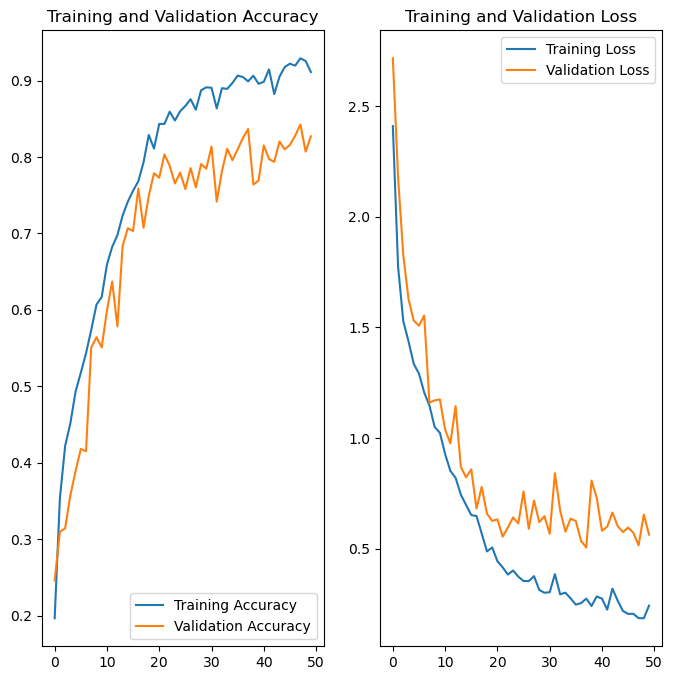

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()